In [1]:
# Task 2: Deep Learning with PyTorch
# Handwritten Digit Classification using CNN on
# MNIST
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define transformations and load dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 55.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]


In [3]:
# Step 2: Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:

# Step 3: Initialize model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Step 4: Train the model
epochs = 5
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/5, Loss: 0.0347
Epoch 2/5, Loss: 0.0381
Epoch 3/5, Loss: 0.0117
Epoch 4/5, Loss: 0.0004
Epoch 5/5, Loss: 0.0650


In [6]:
# Step 5: Evaluate accuracy
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 98.92%


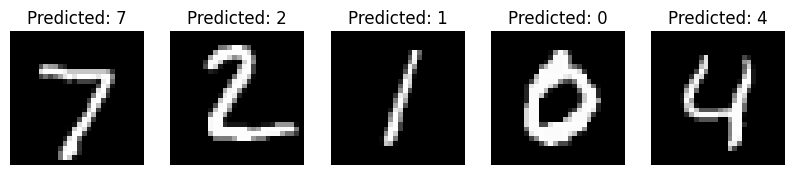

In [7]:
# Step 6: Visualize predictions on 5 sample images
def visualize_predictions():
    sample_images, sample_labels = next(iter(test_loader))
    sample_images = sample_images[:5]

    model.eval()
    with torch.no_grad():
        predictions = model(sample_images)
        predicted_labels = torch.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(sample_images[i].squeeze(), cmap='gray')
        plt.title(f"Predicted: {predicted_labels[i].item()}")
        plt.axis("off")

    plt.show()

visualize_predictions()

In [8]:
plt.show(block=True)